# Working on the Datasets

We will use the pandas library to read the datasets. We will use the `read_csv` method to read the csv files in python and assign it to a dataframe object.

### Required Libraries

- pandas
- matplotlib
- numpy
- scikit-learn


To install the libraries, you can use `pip` or `conda` as follows:

```bash
pip install pandas matplotlib scikit-learn numpy
```

```bash
conda install pandas matplotlib scikit-learn numpy
```


In [1010]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

### About the dataset

This dataset can be found on the following [link](https://www.kaggle.com/datasets/blastchar/telco-customer-churn).

The dataset contains 7043 rows and 21 columns.

The dataset contains information about a telecom company that has a problem with the churn rate of its customers. The company wants to know which customers are likely to churn next month. The dataset contains information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about the customers

In [1011]:
# function to load data
def load_data(file_name):
    # load dataset
    dataset = pd.read_csv(file_name)
    
    # drop the customerID column
    dataset.drop('customerID', axis = 1, inplace = True)
    
    # replace the cells with single and extra spaces with a Nan value
    dataset.replace(r'^\s*$', np.nan, regex=True, inplace = True)
    
    # convert the TotalCharges column to numeric
    dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'])
    
    # convert the dataset to dataframe
    dataset = pd.DataFrame(dataset)
    
    return dataset

dataset = load_data('Telco-Customer-Churn.csv')

# How many rows and columns are in this dataset?
print(dataset.shape)

# Store the column of data types in a list called data_types
data_types = dataset.dtypes

# Print the data type of each column
print(data_types)

# What is the first entry in the dataset?
print(dataset.head(2))

# What is the last entry in the dataset?
print(dataset.tail(2))

# What is the name of each column?
print(dataset.columns)

(7043, 20)
Gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object
   Gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   

  Device

### Checking for missing values

We will check for missing values in the dataset. If there are any missing values, we will replace them with the mean of the column.

In [1012]:
dataset.isnull().sum()   # check for missing values

Gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [1013]:
# function to find the missing columns
def find_missing_columns(dataset):
    dataset_columns_length = len(dataset.columns)
    # Store the column number of the columns with missing values in a list called missing_cols
    missing_cols = [i for i in range(dataset_columns_length) if dataset.iloc[:, i].isnull().any()]
    
    # Print columns index and names with missing values and the number of missing values
    for i in missing_cols:
        print(i, dataset.columns[i], dataset.iloc[:, i].isnull().sum())
            
    return missing_cols

# Store the column number of the columns with missing values in a list called missing_cols
missing_cols = find_missing_columns(dataset)

print(missing_cols)


18 TotalCharges 11
[18]


In [1014]:

def impute_missing_values(dataset, missing_columns):
    for column in missing_columns:
        column_name = dataset.columns[column]
        if dataset[column_name].dtype == 'object' or dataset[column_name].dtype == 'int64':
            imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
            dataset[column_name] = imputer.fit_transform(dataset[column_name].values.reshape(-1, 1)).ravel()
        elif dataset[column_name].dtype == 'float64':
            imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
            dataset[column_name] = imputer.fit_transform(dataset[column_name].values.reshape(-1, 1)).ravel()
    return dataset

dataset = impute_missing_values(dataset, missing_cols)

missing_cols = find_missing_columns(dataset)
print(missing_cols)


[]


### Converting the yes and no values to 1 and 0

We first will scan for those columns that have yes and no values and convert them to 1 and 0 respectively.

**Note:** This cell is dependent on the dataset and the column names. If you are using a different dataset, you will need to change the column names.

In [1015]:
# Name of the column that needs to be encoded in 0s and 1s
column_name = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

# function to convert the yes and no values to 1 and 0
def convert_yes_no(dataset, column_name_to_convert):
    # create a label encoder object
    label_encoder = LabelEncoder()
    
    # Apply label encoder on the column and replace the column with the encoded values
    dataset[column_name_to_convert] = dataset[column_name_to_convert].apply(label_encoder.fit_transform)
    
    # convert the dataset to a dataframe
    dataset = pd.DataFrame(dataset)
    
    return dataset

dataset = convert_yes_no(dataset, column_name)

# Print the first 5 rows of the dataset
# print(dataset.head(5))

print(dataset.dtypes)
print(dataset.columns)


Gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object
Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


### Converting the categorical values to numerical values

Now we will convert the categorical values to numerical values. For this purpose we will use the `OneHotEncoder` class from the `sklearn.preprocessing` module.

In [1016]:
# Name of the column that is a categorical variable
categorical_col_names = ['Gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

# function to convert the categorical values to numerical values using one hot encoding
def convert_categorical(dataset, column_names_to_convert):
    column_index = []
    
    # find the index of the categorical columns
    for column_name in column_names_to_convert:
        column_index.append(dataset.columns.get_loc(column_name))
        
    # convert the dataset to a numpy array
    dataset_array = dataset.values
    
    # one hot encoder object 
    one_hot_encoder = OneHotEncoder(dtype=np.int64, handle_unknown='ignore')

    # apply the one hot encoder object on the independent variable dataset
    encoded_x = one_hot_encoder.fit_transform(dataset_array[:, column_index]).toarray()
    
    # drop the original column from the dataset
    dataset_array = np.delete(dataset_array, column_index, axis = 1)
    
    # add the new columns to the dataset
    dataset_array = np.concatenate((dataset_array, encoded_x), axis = 1)
    
    
    # get the column names of the new columns
    encoded_x_column_names = one_hot_encoder.get_feature_names_out(input_features=column_names_to_convert)
    
    # drop the old column from the dataset
    dataset = dataset.drop(column_names_to_convert, axis = 1)
    
    # record the data types of each column
    original_data_types = dataset.dtypes.to_dict()
    # all the data types are int64 for encoded columns
    
    
    # record the last column number of the dataset
    last_column_number = len(dataset.columns)
    
    # reconstruct the new dataset column names
    new_column_names = list(dataset.columns[0:last_column_number-1]) + list(encoded_x_column_names)
    new_column_names.append(dataset.columns[last_column_number-1])
    
    # rearrange the columns of the dataset_array 
    # i.e. bring the dataset_array column with the last column number to the last column number of the new dataset_array
    dataset_array = np.concatenate((dataset_array[:, 0:last_column_number-1], dataset_array[:, last_column_number:], dataset_array[:, last_column_number-1:last_column_number]), axis = 1)
    
    # convert the dataset to a dataframe
    # Here the column names are the original column names and the one hot encoded column names
    # and the values are the values of the dataset array
    dataset = pd.DataFrame(data=dataset_array, columns = new_column_names)
    
    # restore the original data types of the columns
    for column_name in dataset.columns:
        if column_name in original_data_types:
            dataset[column_name] = dataset[column_name].astype(original_data_types[column_name])
        else:
            dataset[column_name] = dataset[column_name].astype('int64')
    
    return dataset

dataset = convert_categorical(dataset, categorical_col_names)

print(dataset.dtypes)
# print(dataset.columns)

SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Gender_Female                                int64
Gender_Male                                  int64
MultipleLines_No                             int64
MultipleLines_No phone service               int64
MultipleLines_Yes                            int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No                           int64
OnlineSecurity_No                            int64
OnlineSecurity_No internet service           int64
OnlineSecurity_Yes                           int64
OnlineBackup_No                

### Dividing the dataset into dependent and independent variables

We will divide the dataset into dependent and independent variables. 

The dependent variable is the variable that we want to predict.The independent variables are the variables that we will use to predict the dependent variable. In this case, 

- It is the `Churn` column. 
- All the other columns except the `Churn` column and `Customer ID` column.

In [1017]:
# function to divide the dataset into x and y
def divide_dataset(dataset):
    # divide the dataset into x and y
    dataset_columns_length = len(dataset.columns)
    print(dataset_columns_length)

    x = dataset.iloc[:, 0:(dataset_columns_length-1)].values
    y = dataset.iloc[:, (dataset_columns_length-1)].values
    
    return x, y

x, y = divide_dataset(dataset)
# What is the shape of x and y?
print(x.shape)
print(y.shape)


# What is the value of the 1st row of x?
print(x[0])

# What is the value of the 1st row of y?
print(y[0])

42
(7043, 41)
(7043,)
[ 0.    1.    0.    1.    0.    1.   29.85 29.85  1.    0.    0.    1.
  0.    1.    0.    0.    1.    0.    0.    0.    0.    1.    1.    0.
  0.    1.    0.    0.    1.    0.    0.    1.    0.    0.    1.    0.
  0.    0.    0.    1.    0.  ]
0


### Splitting the dataset into training and testing sets

We will split the dataset into training and testing sets. We will use the `train_test_split` method from the `sklearn.model_selection` module to split the dataset into training and testing sets.

In [1018]:
# Split the dataset into training and testing set
from sklearn.model_selection import train_test_split

# function to split the dataset into training and testing set
def split_dataset(x, y):
    # split the dataset into training and testing set
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
    
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = split_dataset(x, y)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5634, 41)
(1409, 41)
(5634,)
(1409,)


### Infomation gain of the features

We will calculate the information gain of the features. We will use the `mutual_info_classif` method from the `sklearn.feature_selection` module to calculate the information gain of the features.

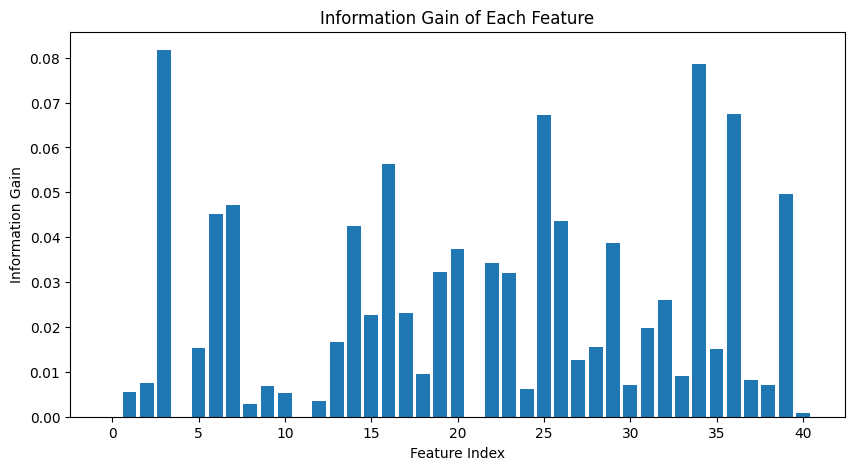

In [1019]:
from sklearn.feature_selection import mutual_info_classif

# function to find the mutual information of each feature
def calculate_information_gain(X, y):
    # Calculate the mutual information between each feature and the target
    mutual_info = mutual_info_classif(X, y)
    
    # Normalize the mutual information values to get information gain
    information_gain = mutual_info / np.sum(mutual_info)
    
    return information_gain

information_gain = calculate_information_gain(x_train, y_train)

# Create a bar plot of the information gain values
plt.figure(figsize=(10, 5))
plt.bar(range(len(information_gain)), information_gain)
plt.title('Information Gain of Each Feature')
plt.xlabel('Feature Index')
plt.ylabel('Information Gain')
plt.show()

# Custom Linear Regression class

We will create a custom linear regression class with the following tweaks:

1. Use information gain to evaluate attribute importance in order to use a subset of features.
1. Control the number of features using an external parameter
1. Early terminate Gradient Descent if error in the training set becomes < 0.5. 
    - Parameterize your function to take the threshold as an input. [if error < threshold, break]
1. Use sigmoid function. We need to calculate the gradient and derive the update rule for the weights accordingly.


In [1020]:
class CustomLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000, early_stopping_threshold=0.5, num_features=None, verbose=False, fit_intercept=True):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.early_stopping_threshold = early_stopping_threshold
        self.num_features = num_features
        self.verbose = verbose
        self.fit_intercept = fit_intercept

    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)

    def __sigmoid(self, z):
        # Limit the values in z to avoid overflow
        z = np.clip(z, -250, 250)
        return 1 / (1 + np.exp(-z))

    def __loss(self, h, y):
        # Add small constants to avoid taking the log of zero
        return (-y * np.log(h + 1e-10) - (1 - y) * np.log(1 - h + 1e-10)).mean()

    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)

        # Select the top features based on information gain
        if self.num_features is not None and self.num_features < X.shape[1] - 1 and self.num_features > 0:
            top_features_indices = np.argsort(-calculate_information_gain(X, y))[:self.num_features]
            X = X[:, top_features_indices]

        # weights initialization
        self.theta = np.zeros(X.shape[1])

        for i in range(self.num_iterations):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.learning_rate * gradient

            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)

            if self.verbose and i % 10000 == 0:
                print(f'loss: {loss} \t')

            if loss < self.early_stopping_threshold:
                break

    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)

        if self.num_features is not None and self.num_features < X.shape[1] - 1 and self.num_features > 0:
            X = X[:, :self.num_features]

        return self.__sigmoid(np.dot(X, self.theta))

    def predict(self, X, threshold=0.5):
        return self.predict_prob(X) >= threshold

In [1021]:
model = CustomLogisticRegression(learning_rate=0.1, num_iterations=100000, early_stopping_threshold=0.5, num_features=10, verbose=False, fit_intercept=True)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[969  49]
 [312  79]]
              precision    recall  f1-score   support

           0       0.76      0.95      0.84      1018
           1       0.62      0.20      0.30       391

    accuracy                           0.74      1409
   macro avg       0.69      0.58      0.57      1409
weighted avg       0.72      0.74      0.69      1409

